# Spotify Songs Emotions

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import os
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import set_config
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Projects/Spotify Songs Emotions/278k_song_labelled.csv')

In [4]:
df.sample(3)

,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
56412,56412,278947.0,0.619,0.683,-7.711,0.1220,0.000563,0.0792,0.3400,0.0894,139.948,4.373591e-07,2
140970,140970,231951.0,0.630,0.473,-5.516,0.0279,0.402000,0.0000,0.1380,0.6250,82.852,1.202840e-07,1
195283,195283,455813.0,0.794,0.595,-8.242,0.0833,0.002070,0.3880,0.0597,0.7360,118.979,1.827504e-07,2


In [5]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df.sample(5)

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
221609,199747.0,0.531,0.25500,-13.270,0.0290,0.741000,0.06360,0.1110,0.0565,107.050,1.451837e-07,0
100444,210629.0,0.590,0.64100,-6.443,0.0591,0.598000,0.00006,0.2500,0.3330,142.961,2.805881e-07,1
258545,179013.0,0.436,0.99400,-3.158,0.2320,0.000023,0.00000,0.0818,0.2260,179.982,1.295995e-06,2
5235,399778.0,0.706,0.91900,-7.469,0.0609,0.000305,0.72600,0.2710,0.4100,146.010,1.523345e-07,2
239665,164613.0,0.156,0.00308,-37.232,0.0421,0.985000,0.87000,0.1100,0.1900,64.945,2.557514e-07,3


In [7]:
# Check total records and columns
print('Total records in dataset = ',df.shape[0])
print('Total columns in dataset = ',df.shape[1])

Total records in dataset =  277938

Total columns in dataset =  12


<Axes: >

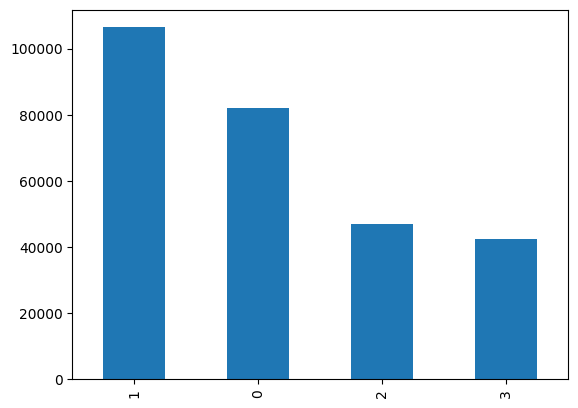

In [8]:
# Plot number of records of every label
df['labels'].value_counts().plot(kind='bar')

<Axes: >

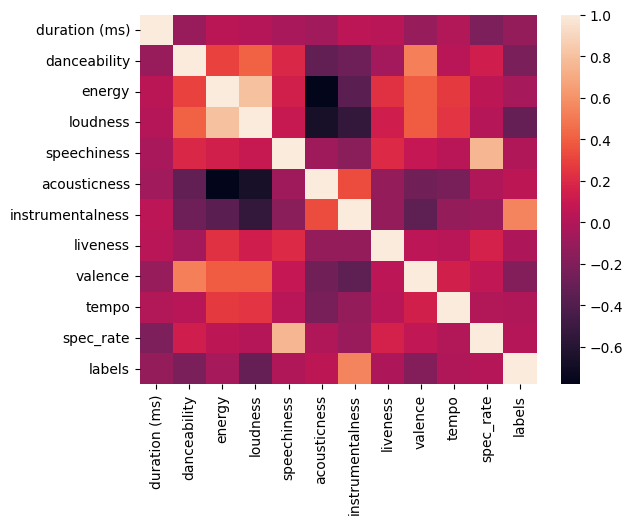

In [9]:
# Plot correlation of every column with each other
sns.heatmap(df.corr())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 277938 entries, 0 to 277937

Data columns (total 12 columns):

 #   Column            Non-Null Count   Dtype  

---  ------            --------------   -----  

 0   duration (ms)     277938 non-null  float64

 1   danceability      277938 non-null  float64

 2   energy            277938 non-null  float64

 3   loudness          277938 non-null  float64

 4   speechiness       277938 non-null  float64

 5   acousticness      277938 non-null  float64

 6   instrumentalness  277938 non-null  float64

 7   liveness          277938 non-null  float64

 8   valence           277938 non-null  float64

 9   tempo             277938 non-null  float64

 10  spec_rate         277938 non-null  float64

 11  labels            277938 non-null  int64  

dtypes: float64(11), int64(1)

memory usage: 25.4 MB


# Try Different Models

In [25]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns = ['labels'] , axis = 1) , df['labels'] , test_size = 0.3, random_state=10)

In [12]:
x_train.shape

(194556, 11)

In [13]:
x_train.head(2)

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate
71481,393750.0,0.766,0.816,-9.054,0.130,0.0233,0.878000,0.0986,0.0334,128.003,3.301587e-07
251375,192000.0,0.645,0.869,-3.343,0.122,0.0160,0.000022,0.4160,0.5060,144.962,6.354167e-07


In [14]:
tf1_lr = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,11))])
tf2_lr = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,11))])
svm = SVC(kernel='linear')


pipe_svm = Pipeline([('Nan Imputer',tf1_lr),('StandardScaler',tf2_lr),('Support Vector Machine',svm)])

pipe_svm.fit(x_train,y_train)

# Calculate the accuracy of the classifier
y_pred_svm = pipe_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

set_config(display='diagram')
pipe_svm

Accuracy: 0.8405051449953227


Pipeline(steps=[('Nan Imputer',
                 ColumnTransformer(transformers=[('Nan Imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  slice(0, 11, None))])),
                ('StandardScaler',
                 ColumnTransformer(transformers=[('Standard Scaler',
                                                  StandardScaler(),
                                                  slice(0, 11, None))])),
                ('Support Vector Machine', SVC(kernel='linear'))])

In [19]:
tf1_dtc = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,11))])
tf2_dtc = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,11))])
dtc = DecisionTreeClassifier()


pipe_dtc = Pipeline([('Nan Imputer',tf1_dtc),('StandardScaler',tf2_dtc),('Decision Tree Classifier',dtc)])

pipe_dtc.fit(x_train,y_train)

# Calculate the accuracy of the classifier
y_pred_dtc = pipe_dtc.predict(x_test)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print("Accuracy:", accuracy_dtc)

set_config(display='diagram')
pipe_dtc

Accuracy: 0.9058070087069151


Pipeline(steps=[('Nan Imputer',
                 ColumnTransformer(transformers=[('Nan Imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  slice(0, 11, None))])),
                ('StandardScaler',
                 ColumnTransformer(transformers=[('Standard Scaler',
                                                  StandardScaler(),
                                                  slice(0, 11, None))])),
                ('Decision Tree Classifier', DecisionTreeClassifier())])

In [21]:
tf1_rfc = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,11))])
tf2_rfc = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,11))])
rfc = RandomForestClassifier()


pipe_rfc = Pipeline([('Nan Imputer',tf1_rfc),('StandardScaler',tf2_rfc),('Random Forest Classifier',rfc)])

pipe_rfc.fit(x_train,y_train)

# Calculate the accuracy of the classifier
y_pred_rfc = pipe_rfc.predict(x_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Accuracy:", accuracy_rfc)

set_config(display='diagram')
pipe_rfc

Accuracy: 0.9420498428917512


Pipeline(steps=[('Nan Imputer',
                 ColumnTransformer(transformers=[('Nan Imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  slice(0, 11, None))])),
                ('StandardScaler',
                 ColumnTransformer(transformers=[('Standard Scaler',
                                                  StandardScaler(),
                                                  slice(0, 11, None))])),
                ('Random Forest Classifier', RandomForestClassifier())])

In [13]:
tf1_xgc = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,11))])
tf2_xgc = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,11))])
xgc = XGBClassifier()


pipe_xgc = Pipeline([('Nan Imputer',tf1_xgc),('StandardScaler',tf2_xgc),('XG Boost Classifier',xgc)])

pipe_xgc.fit(x_train,y_train)

# Calculate the accuracy of the classifier
y_pred_xgc = pipe_xgc.predict(x_test)
accuracy_xgc = accuracy_score(y_test, y_pred_xgc)
print("Accuracy:", accuracy_xgc)

set_config(display='diagram')
pipe_xgc

Accuracy: 0.966047828068408


Pipeline(steps=[('Nan Imputer',
                 ColumnTransformer(transformers=[('Nan Imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  slice(0, 11, None))])),
                ('StandardScaler',
                 ColumnTransformer(transformers=[('Standard Scaler',
                                                  StandardScaler(),
                                                  slice(0, 11, None))])),
                ('Random Forest Classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None,...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

# Best Accurcy is given by XGBoost Classifier which is 96.60 %